<a href="https://colab.research.google.com/github/aanilkumarreddy/DataDiggers/blob/main/dataOptimizationAAPL_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [ ]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

In [ ]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('AAPL', data_source='yahoo', start='2018-01-01', end = "2021-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135757
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128593
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319633
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790070
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634850


In [ ]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


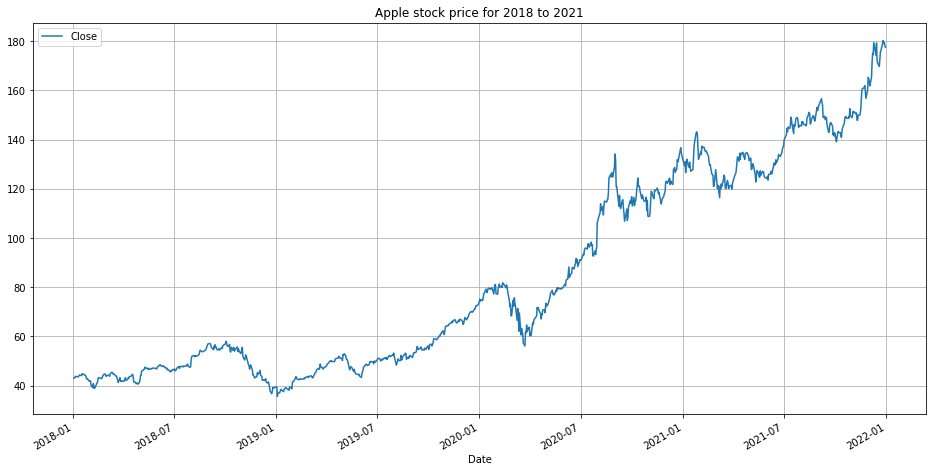

In [ ]:
df.plot(figsize=(16,8), title = "Apple stock price for 2018 to 2021", grid = True)

In [ ]:
#Simple Moving Average

df['SMA_1'] = df.Close.rolling(7, min_periods=1).mean() #Period of 1 week
df['SMA_2'] = df.Close.rolling(14, min_periods=1).mean() #Period of 2 weeks
df['SMA_4'] = df.Close.rolling(28, min_periods=1).mean() #Period of 4 weeks

In [ ]:
#Cumulative Moving Average

df['CMA'] = df.Close.expanding().mean()

In [ ]:
df['EMA_0.1'] = df.Close.ewm(alpha=0.1, adjust=False).mean() #Smoothing factor - 0.1
df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

In [ ]:
df[2:]

,Close,SMA_1,SMA_2,SMA_4,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,
2018-01-04,43.257500,43.126666,43.126666,43.126666,43.126666,43.083574,43.121174
2018-01-05,43.750000,43.282499,43.282499,43.282499,43.282499,43.150216,43.309822
2018-01-08,43.587502,43.343500,43.343500,43.343500,43.343500,43.193945,43.393126
2018-01-09,43.582500,43.383333,43.383333,43.383333,43.383333,43.232800,43.449938
2018-01-10,43.572498,43.410357,43.410357,43.410357,43.410357,43.266770,43.486706
...,...,...,...,...,...,...,...
2021-12-27,180.330002,174.055714,174.859286,167.619644,83.586571,171.377138,176.133878
2021-12-28,179.289993,175.060000,175.438571,168.630001,83.681798,172.168423,177.080713
2021-12-29,179.380005,176.237143,175.745714,169.554643,83.776926,172.889581,177.770500


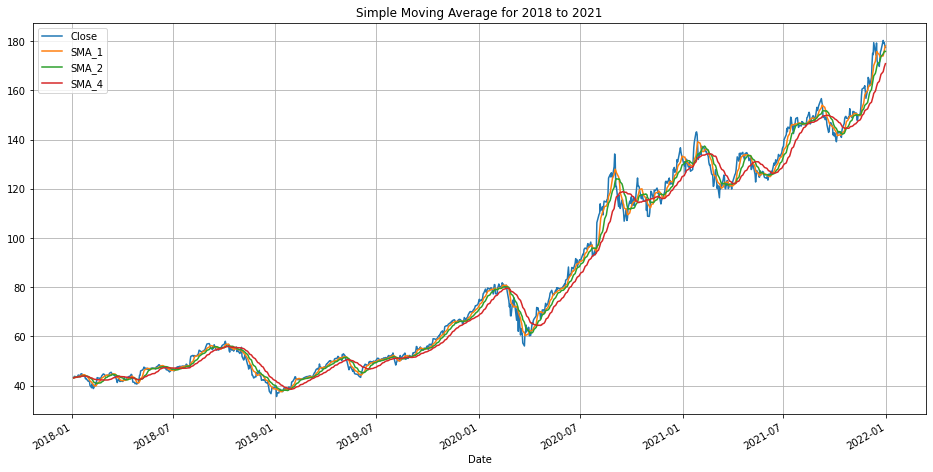

In [ ]:
df[2:][['Close', 'SMA_1', 'SMA_2', 'SMA_4']].plot(figsize=(16,8), title = "Simple Moving Average for 2018 to 2021", grid = True)

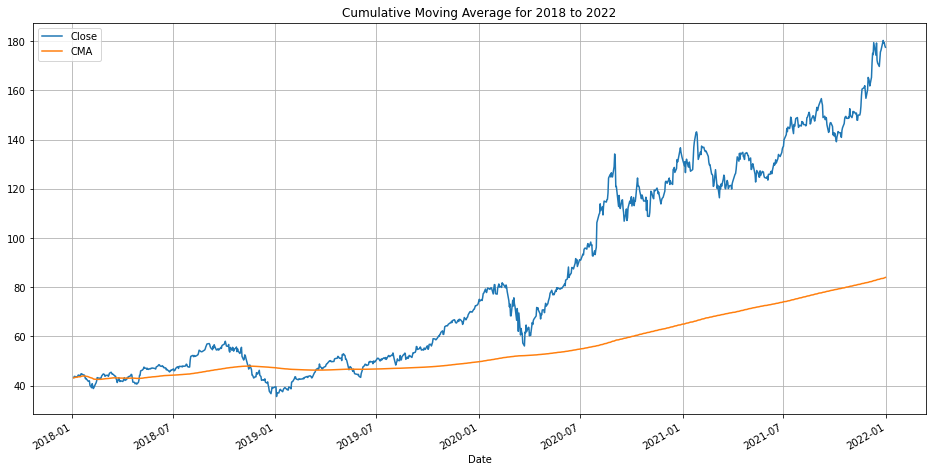

In [ ]:
#Plotting Cumulative Moving Average for 2017 to 2019

df[2:][['Close', 'CMA']].plot(figsize=(16,8), title = "Cumulative Moving Average for 2018 to 2022", grid = True)

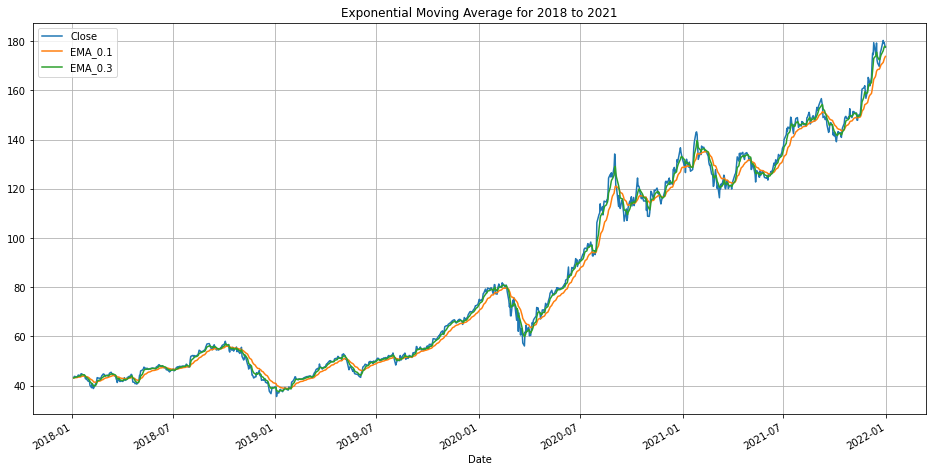

In [ ]:
#Plotting Exponential Moving Average for 2017 to 2019

df[2:][['Close', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average for 2018 to 2021", grid = True)

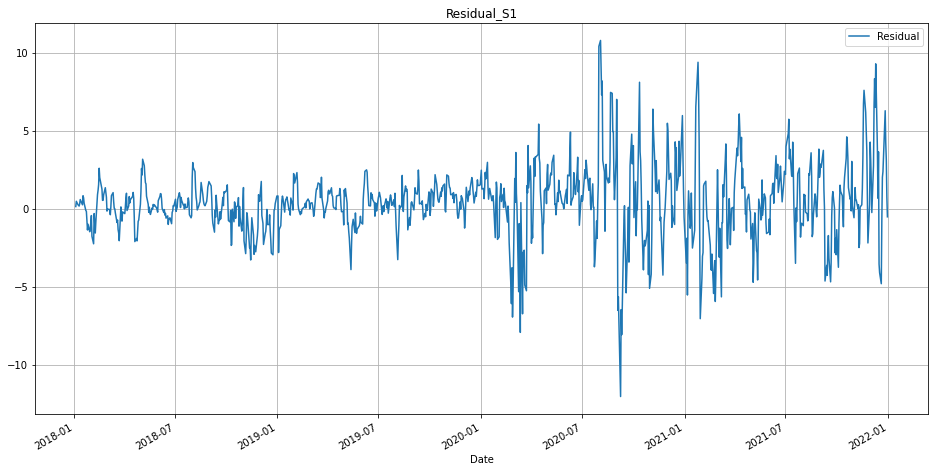

In [ ]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

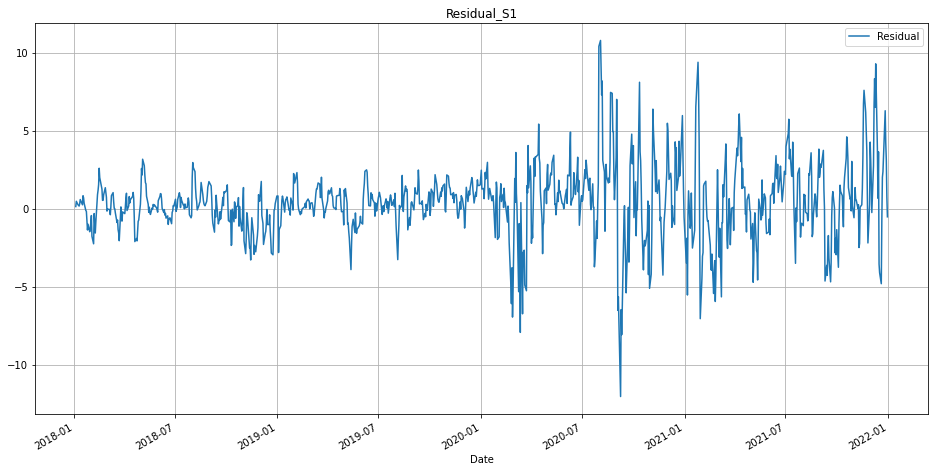

In [ ]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

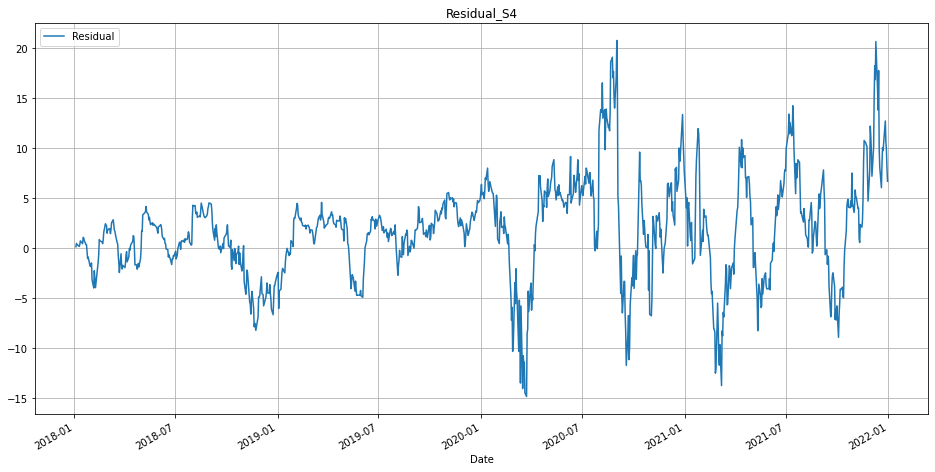

In [ ]:
#Residual (Error) for SMA_4

res = df[2:]['Close'] - df[2:]['SMA_4']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S4', figsize=(16,8), grid = True)

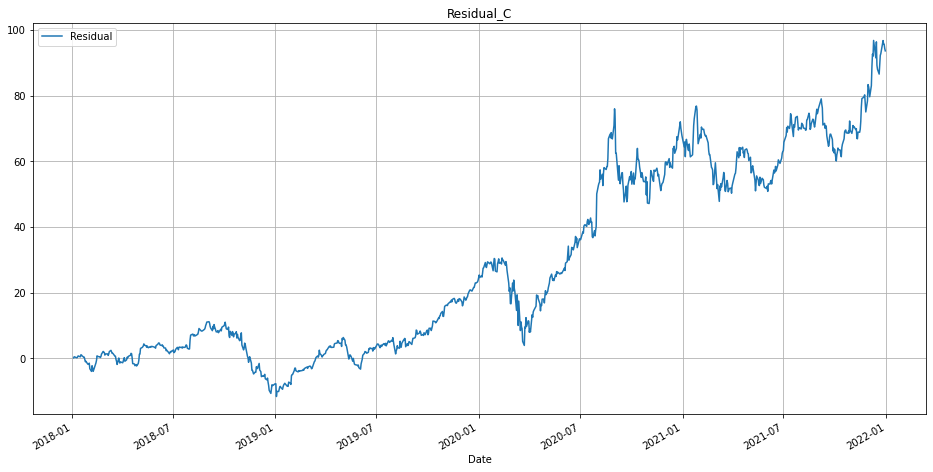

In [ ]:
#Residual (Error) for CMA

res = df[2:]['Close'] - df[2:]['CMA']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_C', figsize=(16,8), grid = True)

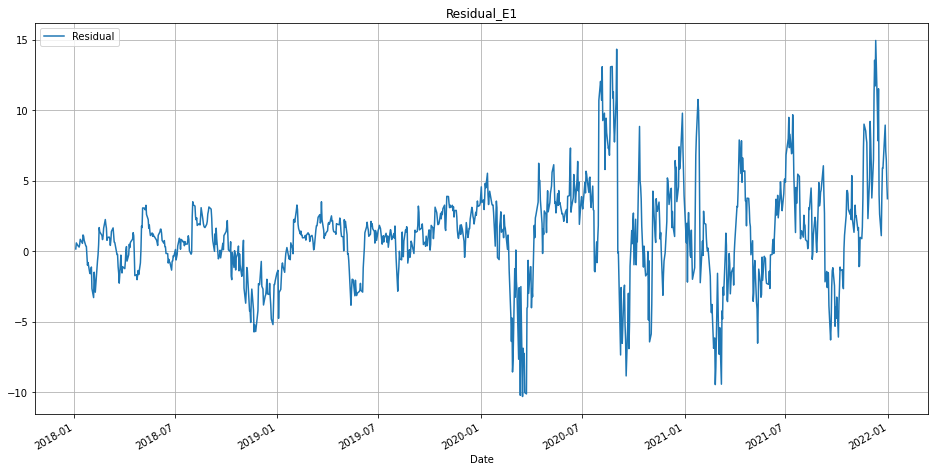

In [ ]:
#Residual (Error) for EMA_0.1

res = df[2:]['Close'] - df[2:]['EMA_0.1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E1', figsize=(16,8), grid = True)

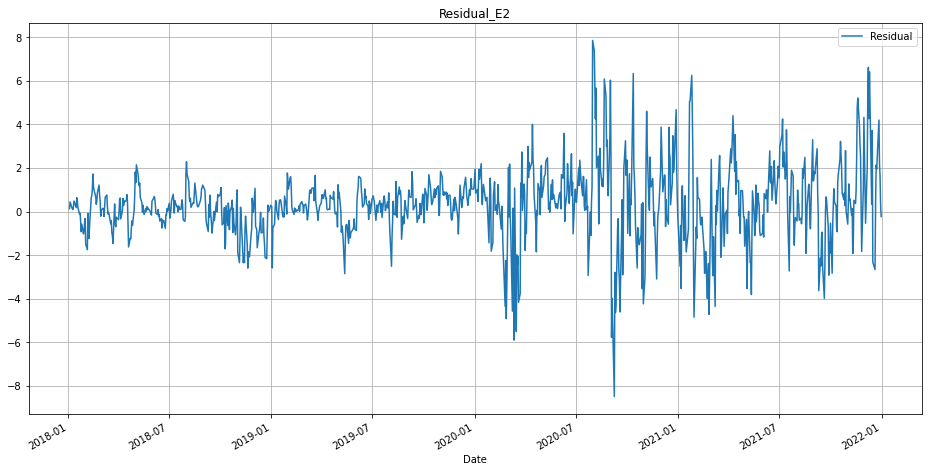

In [ ]:
#Residual (Error) for EMA_0.3

res = df[2:]['Close'] - df[2:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [ ]:
df["S1"] = df[2:]['Close'] - df[2:]['SMA_1']
df["S2"] = df[2:]['Close'] - df[2:]['SMA_2']
df["S4"] = df[2:]['Close'] - df[2:]['SMA_4']

df["C"] = df[2:]['Close'] - df[2:]['CMA']

df["E1"] = df[2:]['Close'] - df[2:]['EMA_0.1']
df["E3"] = df[2:]['Close'] - df[2:]['EMA_0.3']

In [ ]:
df[2:].mean()[7:]

S1     0.403672
S2     0.863124
S4     1.758824
C     28.363657
E1     1.169922
E3     0.312513
dtype: float64

In [ ]:
#Root Mean Square Error(RMSE)

print("Root Mean Square Error for SMA_1:", round(np.sqrt(np.mean((df["S1"] ** 2))), 5))
print("Root Mean Square Error for SMA_2:", round(np.sqrt(np.mean((df["S2"] ** 2))), 5))
print("Root Mean Square Error for SMA_4:", round(np.sqrt(np.mean((df["S4"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for CMA:", round(np.sqrt(np.mean((df["C"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for EMA_1:", round(np.sqrt(np.mean((df["E1"] ** 2))), 5))
print("Root Mean Square Error for EMA_3:", round(np.sqrt(np.mean((df["E3"] ** 2))), 5))

Root Mean Square Error for SMA_1: 2.30738
Root Mean Square Error for SMA_2: 3.47237
Root Mean Square Error for SMA_4: 5.33198
Root Mean Square Error for CMA: 40.42332
Root Mean Square Error for EMA_1: 3.64779
Root Mean Square Error for EMA_3: 1.67828


In [ ]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2:]['Close']
predictions = df[2:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 2.8166306485739674
Mean Absolute Error(MAE): 1.1645611768425583
Root Mean Square Error (RMSE): 1.6782820527473823
